# Sheet 1 - Programming Exercise (Ex. 3):  Single Compartment Model

In the pen-and-paper exercises (Ex. 1 and Ex. 2), we have already computed the response of a point neuron with passive membrane to an input current. In this programming exercise, we will solve the same neuron numerically. In later exercises, we will build on this model, including more sophisticated elements.

This notebook contains the overall structure of the assignment. Please do not delete or alter pre-written code; you will only need to fill in code in specific cells. Parts that need to be changed to solve the tasks always start and end with ### YOUR CODE HERE ###. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [5]:
seaborn.set_context('poster', font_scale=0.7)
seaborn.set_style('ticks')
seaborn.set_palette('colorblind')

We are interested in the equivalent circuit that we already considered in the pen-and-paper exercises.
![](rc_circuit_current.png)
In particular, we want to find the response of the membrane potential over time, denoted as $V(\cdot)$, to some input current $I_e(\cdot)$. We will implement the circuit model, and then approximate $V(\cdot)$ numerically.
First, we need to initialize the model's parameters. We set them as
- membrane equilibrium potential: $E_m = 0V$
- length: $L = 100\mu m$
- diameter: $d = 2\mu m$
- specific membrane resistance: $r_m = 1\Omega m^2$
- specific membrance capacitance: $c_m = 10^{-2} F m^{-2}$

### 3.1

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the model parameters.

Remember to only alter code between the ### YOUR CODE HERE ### statements! The parameters needed for the simulation are already implemented
</div>

In [1]:
delta_t, t_start, t_stop = 1e-4, 0., 0.2

### YOUR CODE HERE ###

Em, L, d, rm, cm = 0, 100e-6, 2e-6, 1, 1e-2

### YOUR CODE HERE ###

default_params = (Em, L, d, rm, cm)

We have the model parameters given as _specific_ values which are normalized spatially, whereas the input current is not given as a density. Thus, we need to convert our specific parameters to non-specific ones.

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function convert_parameters() to convert the specific parameters.

<i>Hint:</i> You only need to convert $r_m$ and $c_m$.
</div>


In [8]:
def convert_parameters(Em, L, d, rm, cm):     
    '''Returns non-speficic paramaters for a given set of specific parameters.
    
    Args:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        rm: Specific membrane resistance
        cm: Specific membrane capacitance
         
    Returns:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        Rm: Membrane resistance
        Mm: Membrane capacitance         
    '''
    
    ### YOUR CODE HERE ###
    
    area = L * np.pi * d
    # area /= 10 ** 6
    
    print(area)
    
    Rm = rm / area
    Cm = cm * area
    ### YOUR CODE HERE ###
    
    return Em, L, d, Rm, Cm

In [10]:
# Call the function to convert the initial parameters

Em, L, d, Rm, Cm = convert_parameters(Em, L, d, rm, cm)

converted_default_params = convert_parameters(*default_params)
print(default_params)
print(converted_default_params)

(0, 0.0001, 2e-06, 1, 0.01)
(0, 0.0001, 2e-06, 1591549430.9189537, 6.283185307179586e-12)


### 3.2

Having initialized the model parameters, we next need to implement the current input to the circuit. First, we will simulate a step input of the form
$$
I_e(t) = 
\begin{cases}
0, & t < 0 \\
-50pA, & 0 \leq t
\end{cases}.
$$

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the step-function input.

</div>


In [14]:
def step_input(time):    
    '''Implements the time-dependent input current I_e.
    
    Args:
        Time as float
         
    Returns:
        Input current at the given time as float     
    '''
    
    ### YOUR CODE HERE ###

    current = -50 * int(time >= 0) * 1e-12
    ### YOUR CODE HERE ###
    
    return current

Now, let's put everything together to simulate the neuron. In the pen-and-paper exercises, we derived the DEQ governing the membrane potential, namely

$$
C_m \frac{\text{d}V}{\text{d}t} = \frac{E_m - V(t)}{R_m} + I_e(t).
$$
To solve this equation, use Euler's backward method to approximate $\frac{\text{d}V}{\text{d}t}$ by
$$
\frac{V(t) - V(t - \Delta t)}{\Delta t}.
$$

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function to simulate the membrane response to the step input by approximating $V(\cdot )$.


</div>

In [15]:
def simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm):     
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points            
    '''
    
    ### YOUR CODE HERE ###
    
    t = np.arange(t_start, t_stop, delta_t)
    v = np.zeros_like(t)
    
    v[0] = Em
    
    for i in range(1, len(t)):
        v[i] = (Cm / delta_t * v[i - 1] + Em / Rm + step_input(t[i])) / (Cm / delta_t + 1 / Rm)
    
    ### YOUR CODE HERE ###
    
    return t, v

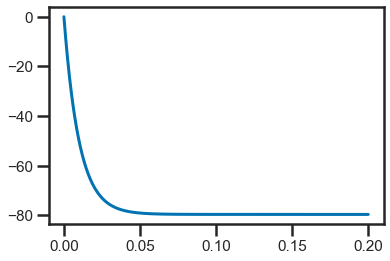

In [20]:
args = (delta_t, t_start, t_stop, Em, L, d, Rm, Cm)

t, v = simulate_step_function(*args)
plt.plot(t, v * 1e3)

<div class="alert alert-block alert-success">
<b>Task:</b> Test your function for different values of $\Delta t$. In particular, set $\Delta t$ to 0.01, 0.001, 0.0001. What changes in the simulation?

<i>Note:</i> In the following, we will play around with the parameters. In each task, set all parameters not explicitly mentioned to equal the initial parameters we defined earlier.
</div>

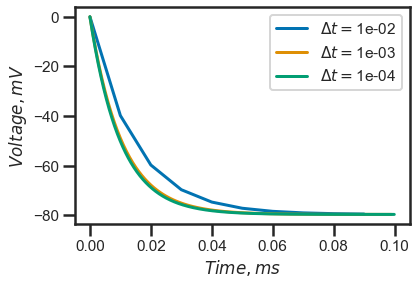

In [18]:
### YOUR CODE HERE ###
(Em, L, d, rm, cm) = converted_default_params

cut_time = 0.1 # ms

for delta_t in (1e-2, 1e-3, 1e-4):
    t, v = simulate_step_function(delta_t, t_start, t_stop, Em, L, d, rm, cm)
    v *= 1e3
    cut_samples = np.argmin(np.abs(t - cut_time))
    plt.plot(t[:cut_samples], v[:cut_samples], label=f"$\Delta t = ${delta_t:.0e}")
    
plt.xlabel("$Time, ms$")
plt.ylabel("$Voltage, mV$")
    
plt.legend()
plt.show()

### YOUR CODE HERE

<b> Your Answer: </b>

Numerical solution with a large time step differs from the solutions with finer time resolution. It also shows clear piecewise linear behavior, while the other solution seem more smooth. 

<div class="alert alert-block alert-success">
<b>Task:</b> From now on, set $\Delta t = 0.0001$. Simulate the neuron for $c_m = 0.01 F m^{-2}$ and $c_m = 0.1 F m^{-2}$. What changes, and why?


</div>

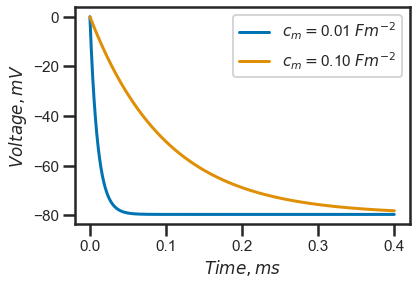

In [21]:
### YOUR CODE HERE ###

### YOUR CODE HERE ###

(Em, L, d, rm, cm) = default_params

delta_t = 1e-4

for cm in (0.01, 0.1):
    Em, L, d, Rm, Cm = convert_parameters(Em, L, d, rm, cm)
    t, v = simulate_step_function(delta_t, t_start, 0.4, Em, L, d, Rm, Cm)
    v *= 1e3
    plt.plot(t, v, label=f"$c_m = ${cm:.2f} $Fm^{{-2}} $")
    
plt.xlabel("$Time, ms$")
plt.ylabel("$Voltage, mV$")
    
plt.legend()
plt.show()

### YOUR CODE HERE
### YOUR CODE HERE ###

<b> Your Answer: </b>

The solution with higher capacitance converges to a steady-state value much slower. The time-varying behavior of the system depends mainly on a capacitor and time constant $\tau = RC$. With increasing capacitance time constant will become proportionally larger, indicating a proportionally faster decay of an exponent $$e^{-t/\tau}$$

<div class="alert alert-block alert-success">
<b>Task:</b> Simulate the neuron for $r_m = 1\Omega m^2$ and $r_m = 10 \Omega m^2$. What changes, and why?


</div>

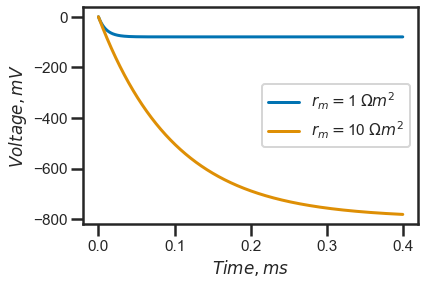

In [24]:
### YOUR CODE HERE ###

### YOUR CODE HERE ###

### YOUR CODE HERE ###

(Em, L, d, rm, cm) = default_params

for rm in (1, 10):
    Em, L, d, Rm, Cm = convert_parameters(Em, L, d, rm, cm)
    t, v = simulate_step_function(delta_t, t_start, 0.4, Em, L, d, Rm, Cm)
    v *= 1e3
    plt.plot(t, v, label=f"$r_m = ${rm} $\Omega m^2$")
    
plt.xlabel("$Time, ms$")
plt.ylabel("$Voltage, mV$")
    
plt.legend()
plt.show()

### YOUR CODE HERE
### YOUR CODE HERE ###
### YOUR CODE HERE ###

<b> Your Answer: </b>

In case of changing the membrane resistance two things happen. First, the convergence of a solution to a steady state value becomes much slower, as in the previous case, due to the proportional change in the time constant $\tau = RC$. Secondly, the steady state value changes itself, because with applied constant step current the solution will converge to a value of $$ V = E_m + I_0R_m$$, which is proportional to $R_m$.

### 3.3

Finally, we will simulate the response to a sinusoidal input current given by
$$
I_e(t) = 100 pA \sin (2 \pi f t),
$$
and run the model for different frequencies.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the sinusoidal input function.

</div>

In [29]:
def sinusoidal_input(time, frequency):
    '''Implements the time-dependent sinusoidal input current I_e.
    
    Args:
        time: Time as float
        frequency: Frequency parameter f
         
    Returns:
        Sinusoidal input current at the given time as float     
    '''
    
    ### YOUR CODE HERE ###
    
    current = 100 * np.sin(2 * np.pi * frequency * time) * 1e-12
    
    ### YOUR CODE HERE ###
    
    return current

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function to simulate the membrane response to the sinusoidal input by approximating $V(\cdot )$.
</div>

In [30]:
def simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):    
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
        frequency: The frequency f of the sinusoidal input
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points     
    '''
    
    ### YOUR CODE HERE ###
    
    t = np.arange(t_start, t_stop, delta_t)
    v = np.zeros_like(t)
    
    v[0] = Em
    
    for i in range(1, len(t)):
        v[i] = (Cm / delta_t * v[i - 1] + Em / Rm + sinusoidal_input(t[i], frequency)) / (Cm / delta_t + 1 / Rm)
    
        
    ### YOUR CODE HERE ###
    
    return t, v

Text(0.5, 47.5, 'Time, ms')

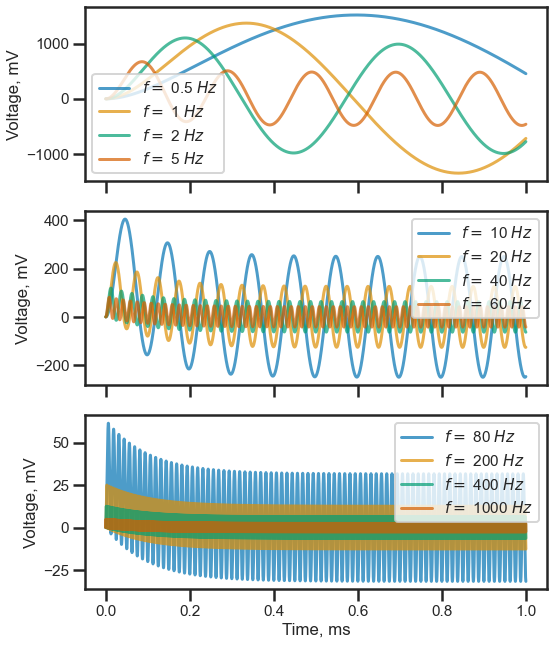

In [31]:
### Feel free to test your function for different values of f (freq)

### YOUR CODE HERE

freqs = [0.5, 1, 2, 5, 10, 20, 40, 60, 80, 200, 400, 1000]
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8, 9))

for i, freq in enumerate(freqs):
    ax = axes[i // 4]
    
    t, v = simulate_sinusoidal_function(delta_t, t_start, 1, Em, L, d, Rm, Cm, frequency=freq)
    v *= 1e3
    ax.plot(t, v, label=f"$f = $ {freq} $Hz$", alpha=0.7)
    #ax.set_xlabel("Time, ms")
    ax.set_ylabel("Voltage, mV")
    ax.legend()
    
plt.tight_layout()
    
ax.set_xlabel("Time, ms")

### YOUR CODE HERE

When the system has converged in your simulation, plot the log of the amplitude of the solution against the log of the input frequency. Use the frequencies
    
- $f_1 = 0.5$Hz
- $f_2 = 1$Hz 
- $f_3 = 2$Hz 
- $f_4 = 8$Hz 
- $f_5 = 100$Hz 
- $f_6 = 1000$Hz 

Text(0, 0.5, '$log(amplitude)$')

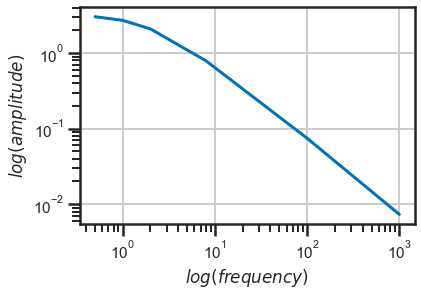

In [32]:
### YOUR CODE HERE ###

freqs      = np.array([0.5, 1, 2, 8, 100, 1000])
amplitudes = np.zeros_like(freqs)

for i in range(len(freqs)):
    t, v = simulate_sinusoidal_function(delta_t, t_start, 10, Em, L, d, Rm, Cm, frequency=freqs[i])
    amplitudes[i] = np.abs(np.max(v[:-100]) - np.min(v[:-100]))
    
    
plt.loglog(freqs, amplitudes)
plt.grid()
plt.xlabel("$log(frequency)$")
plt.ylabel("$log(amplitude)$")
### YOUR CODE HERE ###

In [36]:
n = 10

x = np.ones(n).reshape((n, 1))

x.T @ x

array([[10.]])